In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [8]:
sources = pd.read_csv('Data/points_eau.csv', delimiter=';', usecols=[0, 1], index_col=0)
sources

,BSS_ID
CODE_BSS,
00471X0095/PZ2013,BSS000EBLL
00487X0015/S1,BSS000EECH
00755X0006/S1,BSS000FHCQ
00762X0004/S1,BSS000FHYM
00766X0004/S1,BSS000FJMV
01258X0020/S1,BSS000JRAR
01516X0004/S1,BSS000LETA
01584X0023/LV3,BSS000LVDM
02206X0022/S1,BSS000RQYV


In [17]:
performances = pd.read_csv('performances.csv', index_col=0)
performances = performances[['best_model_at_test', 'val_loss', 'test_loss', 'runtime_in_sec']] # re-order columns
performances['runtime_in_sec'] /= 60 # convert to minutes
performances['BSS_ID'] = performances.index.to_series().apply(lambda i: sources.loc[i]['BSS_ID'])
performances = performances.rename(columns={
    'val_loss': 'Validation loss',
    'test_loss': 'Test loss',
    'best_model_at_test': 'Best model',
    'runtime_in_sec': 'Running time (min)'
})
performances

,Best model,Validation loss,Test loss,Running time (min),BSS_ID
00471X0095/PZ2013,conv,0.168768,0.197973,2.548762,BSS000EBLL
00487X0015/S1,conv,0.015693,0.013800,2.285985,BSS000EECH
00755X0006/S1,conv,0.006993,0.018619,2.932465,BSS000FHCQ
00762X0004/S1,conv,0.002379,0.005072,2.764477,BSS000FHYM
00766X0004/S1,conv,0.083881,0.116865,2.611355,BSS000FJMV
01258X0020/S1,conv,0.008772,0.030382,4.216609,BSS000JRAR
01516X0004/S1,Resnet,0.017034,0.008552,4.491194,BSS000LETA
01584X0023/LV3,conv,0.211561,0.443117,14.811060,BSS000LVDM
02206X0022/S1,Resnet,0.040808,0.061869,40.427913,BSS000RQYV
02267X0030/S1,Resnet,0.004580,0.005598,3.479435,BSS000RYUY


In [38]:
performances.agg(['mean', 'std'])

,Validation loss,Test loss,Running time (min)
mean,0.152639,0.110699,6.009435
std,0.210320,0.136816,9.222852


In [42]:
performances['Running time (min)'].sum()

108.16983318726221

In [22]:
performances.set_index('BSS_ID').to_latex('performances.tex', float_format="%.2f")

In [46]:
performances['Best model'].value_counts()

conv      9
lstm      6
Resnet    3
Name: Best model, dtype: int64

In [37]:
performances.groupby('Best model').max()

,Validation loss,Test loss,Running time (min),BSS_ID
Best model,,,,
Resnet,0.040808,0.061869,40.427913,BSS000RYUY
conv,0.229644,0.443117,14.811060,BSS001VTUD
lstm,0.717148,0.396375,10.686228,BSS001URLS


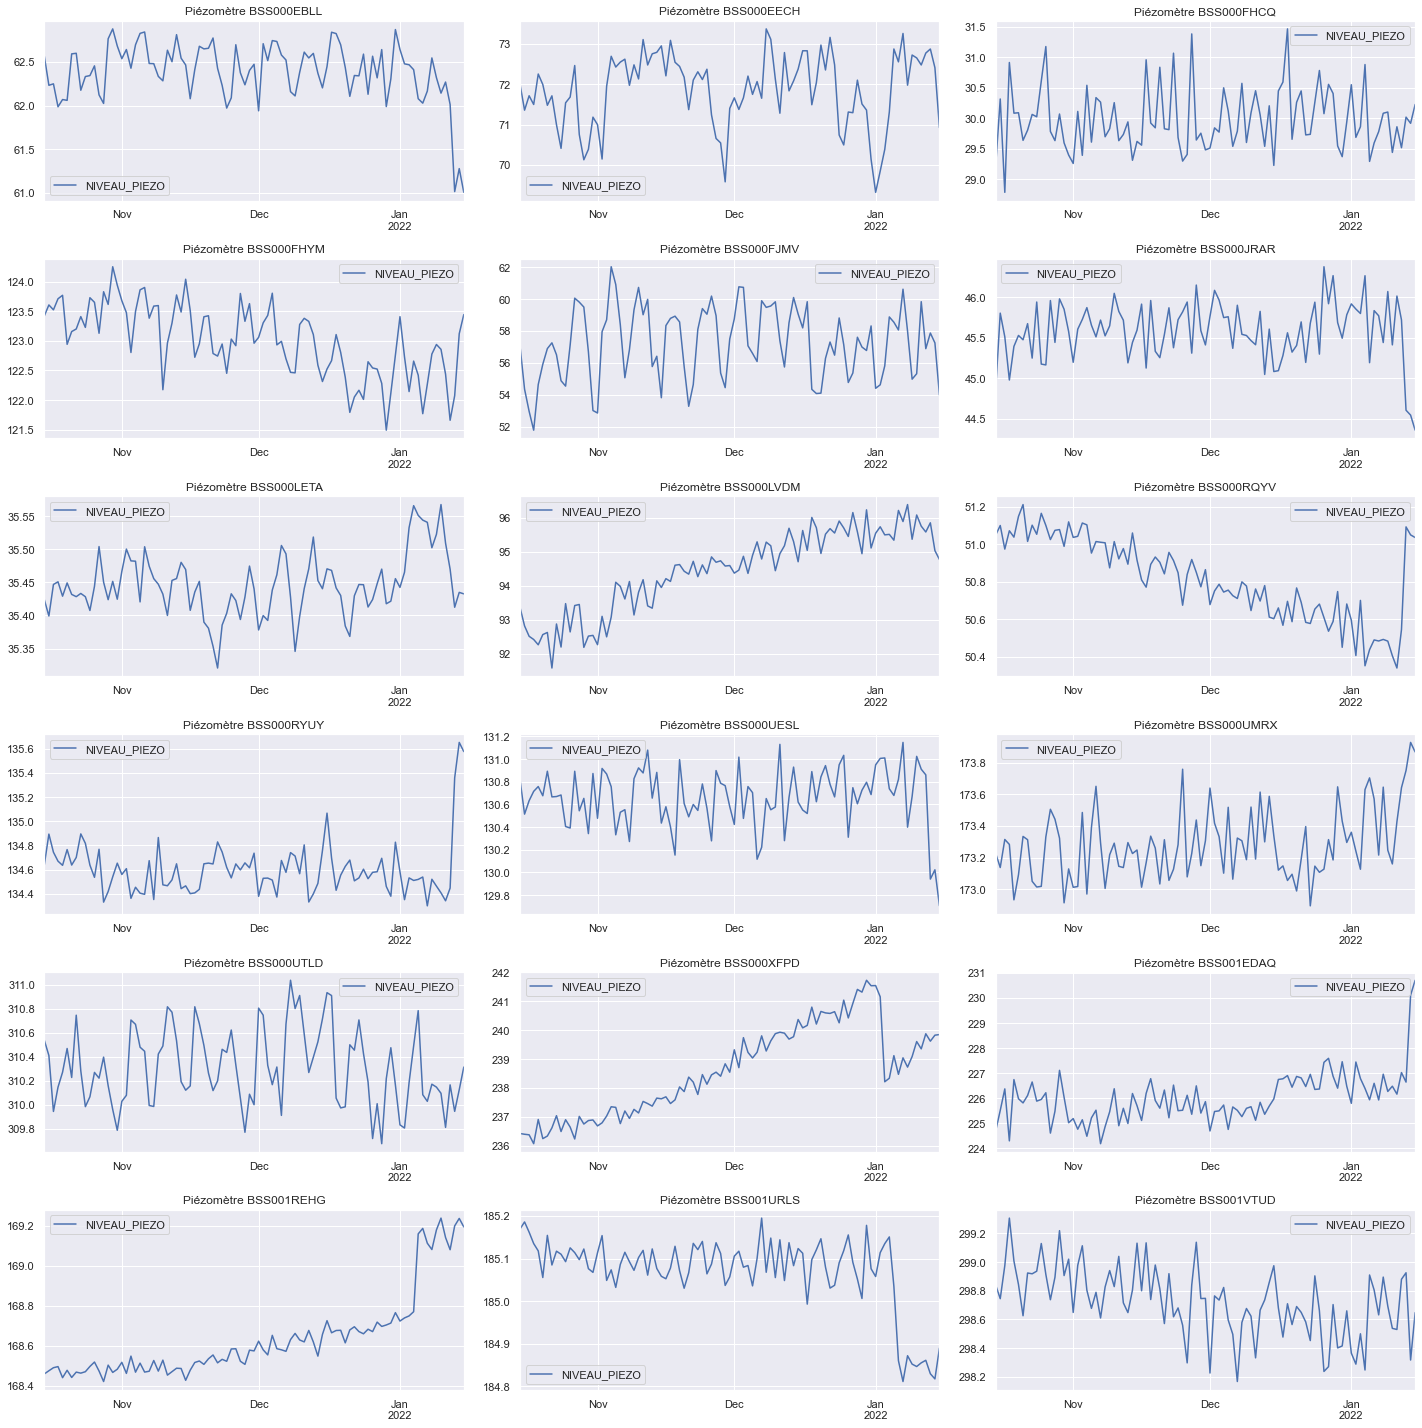

In [36]:
submission = pd.read_csv('submission.csv', index_col=0)
submission.DATE = pd.to_datetime(submission.DATE)

nrows = 6
ncols = 3

plt.figure(figsize=(20, 20))

for i, (index, bss_id) in enumerate(performances.BSS_ID.iteritems()):
    df = submission[submission.index==index]
    df = df.set_index('DATE')
    
    ax = plt.subplot(nrows, ncols, i+1)
    df.plot(ax=ax, title=f'Piézomètre {bss_id}', xlabel='')

plt.tight_layout()
plt.savefig('Images/forecasts.png')